 **Each section corresponds to a scale $j$ such that $2^{J-j}$ = #section. The conditional energy $\bar E(\bar x_{j+1} \vert x_{j+1}) $ is learned. We provide both SGD and direct estimate learning, and two different types of scalar potentials for the low frequency $x_J$. The application to other scales and $\bar x_j$ is straightforward.**

# Import Packages

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
import sys
import pickle
#Importing the package
path = '/content/drive/MyDrive/Colab Notebooks/'
sys.path.append(os.path.abspath(path+'WCRG'))
sys.path.append(os.path.abspath(path+'WCRG/WCRG'))
sys.path.append(os.path.abspath(path+'WCRG/Wavelet_Packets'))
sys.path.append(os.path.abspath(path+'WCRG/WCRG/Models'))
#Wavelets
from Wavelet_Packets import *
#Ansatz
from WCRG import *


# Import Data and Define wavelet

In [40]:
#directories for models and synthesis
dir_synth = 'content/drive/MyDrive/Colab Notebooks/WCRG/Notebooks Examples/Synths/'
dir_mod = '/content/drive/MyDrive/Colab Notebooks/WCRG/Notebooks Examples/Models/'
#This key will be add to file name for synthesis and loading
KEY = '128_phi4_0.68'
#Import data
device='cuda' #could be 'cpu' as well
Data = torch.tensor(np.load('/content/drive/MyDrive/Colab Notebooks/Phi4/phi4_L128_Beta0.68.npy')).to(device).to(torch.float32)
print(Data.mean(),Data.std())
#Normalising Data
Data= (Data - Data.mean())/Data.std()
print(Data.shape)
#Computing the number of scales
J=int(np.log2(Data.shape[-1])) #Images of size 2**J
print('J = '+str(J))

tensor(0.0266, device='cuda:0') tensor(0.9076, device='cuda:0')
torch.Size([10000, 128, 128])
J = 7


In [41]:
#Wavelet
m=4
W=Db_wavelets(m,device='cuda',mode='Periodic') #Debauchies 4

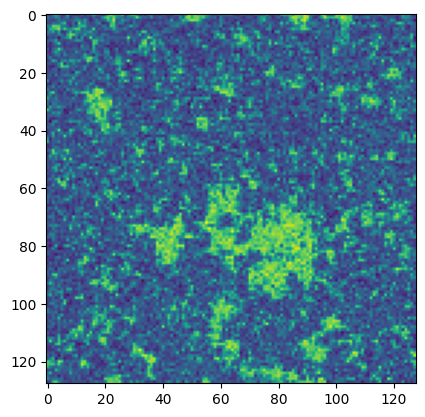

tensor(-0.4312, device='cuda:0')


In [42]:
plt.imshow(Data[0].cpu())
plt.show()
print(Data[1].mean())

# 1 (With Direct Estimate)

We train the ansatz $E(x_J)$, using a direct matrix inversion, and quantility spaced potentials.

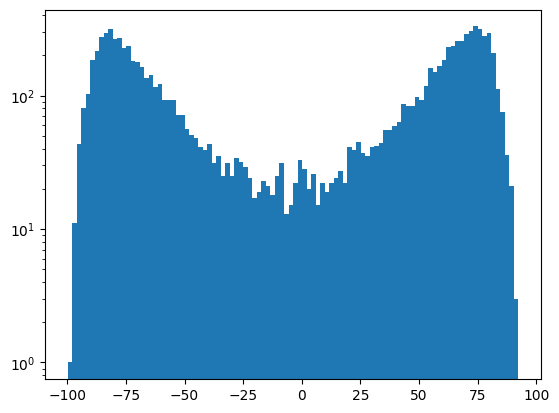

In [ ]:
L=1
depth = J-int(np.log2(L))
phi_s = load_data(W,Data,depth,J)

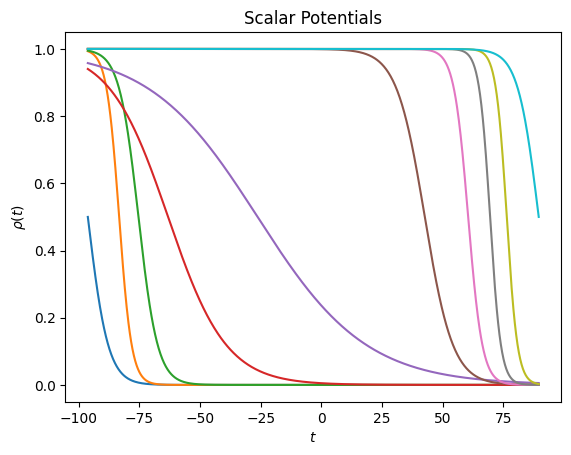

In [ ]:
#Scalar Potentials Positioning
num_potentials = 10
centers,sigma = quantile_centers(phi_s,num_potentials,quantile_min=0.001,quantile_max=0.999,extent =0.65*0.5,device='cuda')
#Visualize
Plot_Sigmoid(centers,sigma)
#Shifts
shifts = ()
#Ansatz
ansatz = ANSATZ_NoCondi(L,centers,sigma,shifts,shifts_sym = False)

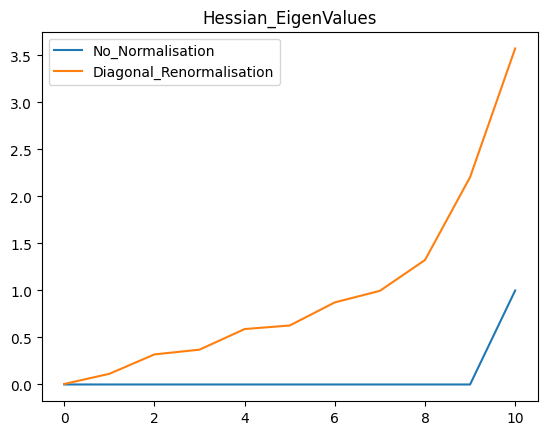

No_Normalisation_Conditioning = tensor(3.0837e+08)
Diagonal_Renormalisation_Conditioning = tensor(660.2252)
LOSS =tensor(-0.0089, device='cuda:0', grad_fn=<SubBackward0>)


In [ ]:
#Train Ansatz with direct matrix inversion
dataloader = torch.utils.data.DataLoader(phi_s, batch_size=1000)
direct_estimate(dataloader,ansatz,mean_mode=False)

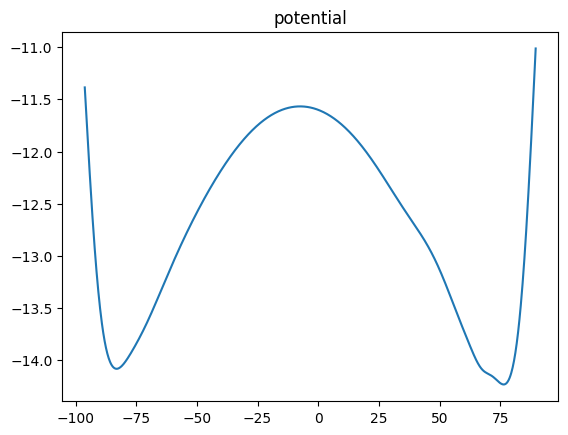

In [ ]:
ansatz.L = L
#Visualize Potential
Show_Sigmoid(ansatz,add_Trace=True,Free=False,index_scalar=0,index_quad=1)

In [ ]:
#save
#save_ansatz(ansatz,L,KEY,dir_mod)

# 1 (With SGD)

We train the ansatz $E(x_J)$, using SGD, and linespaced potentials.

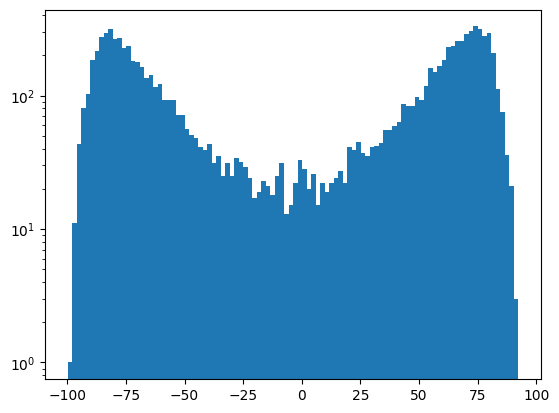

In [41]:
#Loading Data x_J
L=1
depth = J-int(np.log2(L))
phi_s = load_data(W,Data,depth,J)

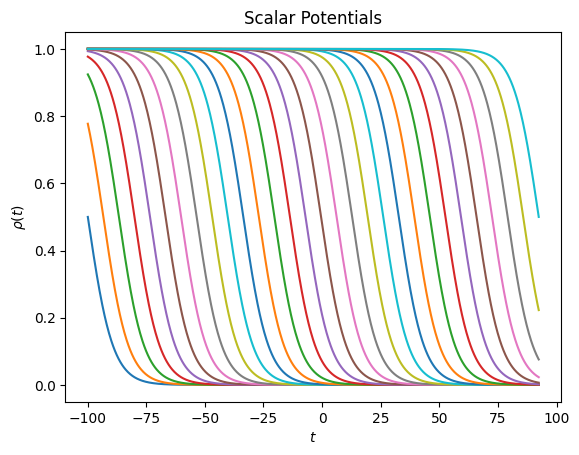

In [36]:
#Scalar Potentials Positioning
window_min,window_max = phi_s.min(),phi_s.max() #The window to consider for scalar potentials
num_potentials = 30
# For linspaced potentials
centers,sigma = linspace_centers(window_min,window_max,num_potentials,extent =0.8,device='cuda')
#Visualize
Plot_Sigmoid(centers,sigma)
#Shifts
shifts = ()
#Ansatz
ansatz = ANSATZ_NoCondi(L,centers,sigma,shifts,shifts_sym = False)

In [37]:
#Train Ansatz
dataloader = torch.utils.data.DataLoader(phi_s, batch_size=1000)
#Normalise Hessian in order to improve conditionning
Diagonal_Renormalisation(dataloader,ansatz,mean_mode=False)
#Optimisation
optim(ansatz,dataloader,num_epochs=10,lr=1e-2,momentum=0,weight_decay=0)

[0/10] loss: 0.0
[0/10] loss: -0.00061086955
[0/10] loss: -0.0011671304
[0/10] loss: -0.0017714555
[0/10] loss: -0.0020103052
[0/10] loss: -0.0027614469
[0/10] loss: -0.003211752
[0/10] loss: -0.0036035753
[0/10] loss: -0.0039353189
[0/10] loss: -0.004239127
[1/10] loss: -0.004078256
[1/10] loss: -0.0048353304
[1/10] loss: -0.0043637659
[1/10] loss: -0.0049614194
[1/10] loss: -0.0053505488
[1/10] loss: -0.0052277325
[1/10] loss: -0.0065546902
[1/10] loss: -0.0058908677
[1/10] loss: -0.0059621972
[1/10] loss: -0.0063654743
[2/10] loss: -0.0061564622
[2/10] loss: -0.0065437639
[2/10] loss: -0.0063747074
[2/10] loss: -0.0069385497
[2/10] loss: -0.0060530175
[2/10] loss: -0.0066818483
[2/10] loss: -0.0076077469
[2/10] loss: -0.0066229496
[2/10] loss: -0.0064429245
[2/10] loss: -0.0073414226
[3/10] loss: -0.0062684487
[3/10] loss: -0.0066782599
[3/10] loss: -0.0064661102
[3/10] loss: -0.0089367162
[3/10] loss: -0.0062448368
[3/10] loss: -0.0070307446
[3/10] loss: -0.0075534605
[3/10] loss: 

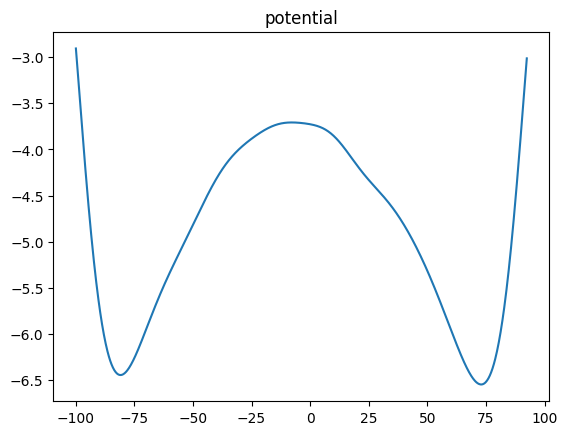

In [38]:
#Visualize Potential
Show_Sigmoid(ansatz,add_Trace=True,Free=False,index_scalar=0,index_quad=1)

In [39]:
#save
save_ansatz(ansatz,L,KEY,dir_mod)

# 2 

We train the ansatz $\bar E(\bar x_{j+1}\vert x_{j+1})$, using SGD, and linespaced potentials.

depth = 6


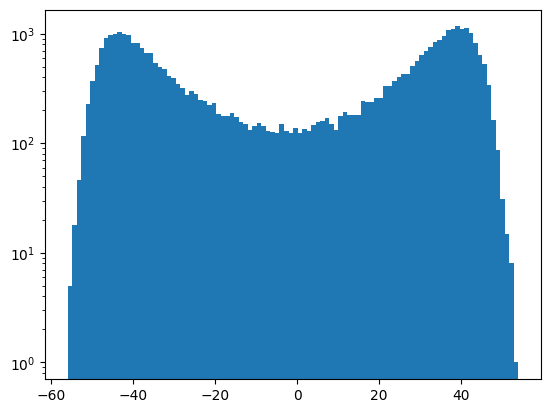

In [42]:
#Loading Data x_j
L=2
depth = J-int(np.log2(L))
print('depth = '+str(depth))
phi_s = load_data(W,Data,depth,J)

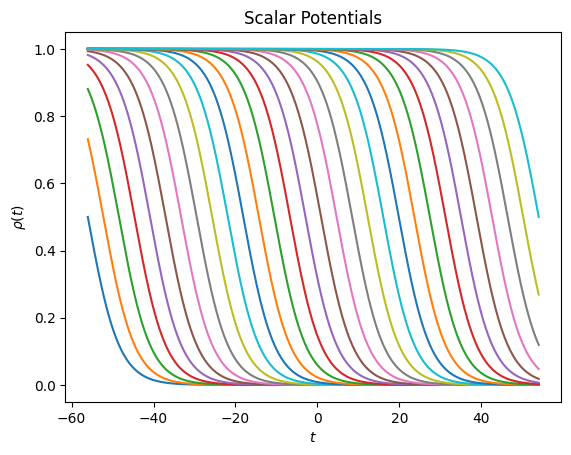

In [46]:
#Scalar Potentials Positioning
window_min,window_max = phi_s.min(),phi_s.max()
num_potentials = 30
centers,sigma = linspace_centers(window_min,window_max,num_potentials,extent =1,device='cuda')
#Visualize
Plot_Sigmoid(centers,sigma)
#Shifts
shifts = ()
mode = 'All'
#Ansatz
ansatz =ANSATZ_Wavelet(W,L,centers,sigma,mode,shifts)

In [47]:
#Train Ansatz
dataloader = torch.utils.data.DataLoader(phi_s, batch_size=1000)
#Normalise Hessian in order to improve conditionning
Diagonal_Renormalisation(dataloader,ansatz,mean_mode=False)
optim(ansatz,dataloader,num_epochs=10,lr=1e-2,momentum=0,weight_decay=0)
optim(ansatz,dataloader,num_epochs=10,lr=1e-3,momentum=0,weight_decay=0)

[0/10] loss: 0.0
[0/10] loss: -0.01083149
[0/10] loss: -0.019012716
[0/10] loss: -0.02682052
[0/10] loss: -0.031944185
[0/10] loss: -0.036707707
[0/10] loss: -0.041358553
[0/10] loss: -0.043924026
[0/10] loss: -0.047265463
[0/10] loss: -0.047179978
[1/10] loss: -0.051215328
[1/10] loss: -0.053176686
[1/10] loss: -0.054655459
[1/10] loss: -0.053869069
[1/10] loss: -0.056411192
[1/10] loss: -0.06174843
[1/10] loss: -0.062207568
[1/10] loss: -0.063333094
[1/10] loss: -0.06082432
[1/10] loss: -0.061213624
[2/10] loss: -0.060414221
[2/10] loss: -0.058068499
[2/10] loss: -0.061222292
[2/10] loss: -0.06590157
[2/10] loss: -0.055389792
[2/10] loss: -0.063148625
[2/10] loss: -0.065334551
[2/10] loss: -0.067103125
[2/10] loss: -0.068560824
[2/10] loss: -0.071831495
[3/10] loss: -0.05673378
[3/10] loss: -0.056164879
[3/10] loss: -0.066140801
[3/10] loss: -0.069006458
[3/10] loss: -0.066129416
[3/10] loss: -0.064752333
[3/10] loss: -0.074173689
[3/10] loss: -0.066487998
[3/10] loss: -0.061999727
[

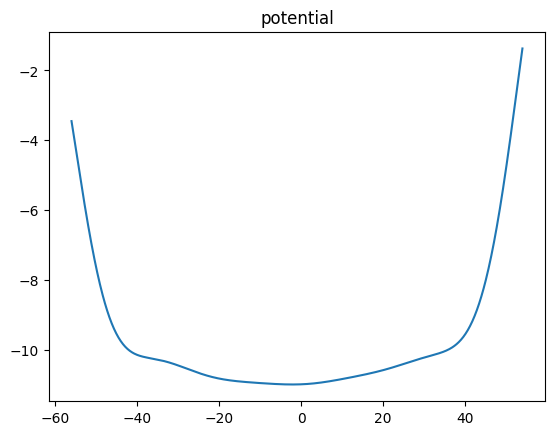

In [48]:
#Visualize Potential
Show_Sigmoid(ansatz)

In [49]:
#save
save_ansatz(ansatz,L,KEY,dir_mod)

# 4

depth = 5


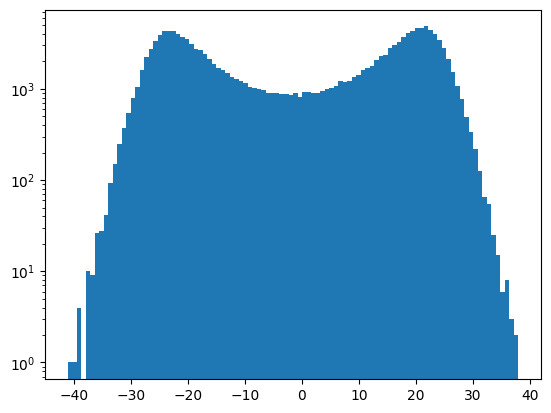

In [50]:
L=4
depth = J-int(np.log2(L))
print('depth = '+str(depth))
phi_s = load_data(W,Data,depth,J)

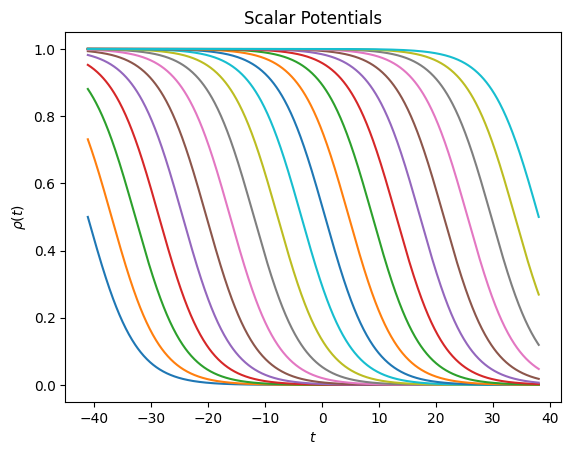

In [53]:
#Scalar Potentials Positioning
window_min,window_max = phi_s.min(),phi_s.max()#phi_s.min(),phi_s.max()
num_potentials = 20
centers,sigma = linspace_centers(window_min,window_max,num_potentials,extent =1,device='cuda')
#centers,sigma = quantile_centers(phi_s,num_potentials,quantile_min=0.001,quantile_max=0.999,extent =0.65*0.5,device='cuda')
#Visualize
Plot_Sigmoid(centers,sigma)
#Shifts
shifts = ((1,0),(0,1),(1,1))
mode = 'All'
#Ansatz
ansatz =ANSATZ_Wavelet(W,L,centers,sigma,mode,shifts,shifts_sym=True)

In [54]:
#Train Ansatz
dataloader = torch.utils.data.DataLoader(phi_s[::10], batch_size=100)
#Normalise Hessian in order to improve conditionning
Diagonal_Renormalisation(dataloader,ansatz,mean_mode=False)
optim(ansatz,dataloader,num_epochs=10,lr=1e-2,momentum=0,weight_decay=0)
optim(ansatz,dataloader,num_epochs=10,lr=1e-3,momentum=0,weight_decay=0)

[0/10] loss: 0.0
[0/10] loss: -0.063701153
[0/10] loss: -0.12444635
[0/10] loss: -0.17026629
[0/10] loss: -0.2104492
[0/10] loss: -0.23735523
[0/10] loss: -0.24485326
[0/10] loss: -0.30681854
[0/10] loss: -0.26789314
[0/10] loss: -0.34657764
[1/10] loss: -0.32547331
[1/10] loss: -0.30294782
[1/10] loss: -0.34474599
[1/10] loss: -0.30972701
[1/10] loss: -0.32304463
[1/10] loss: -0.27849776
[1/10] loss: -0.37525702
[1/10] loss: -0.38257021
[1/10] loss: -0.34777576
[1/10] loss: -0.38519424
[2/10] loss: -0.3691608
[2/10] loss: -0.37352198
[2/10] loss: -0.36918756
[2/10] loss: -0.3140285
[2/10] loss: -0.36614504
[2/10] loss: -0.33854544
[2/10] loss: -0.3817212
[2/10] loss: -0.46267465
[2/10] loss: -0.39980435
[2/10] loss: -0.39220604
[3/10] loss: -0.37897253
[3/10] loss: -0.30464569
[3/10] loss: -0.41823846
[3/10] loss: -0.3382912
[3/10] loss: -0.42836949
[3/10] loss: -0.37886012
[3/10] loss: -0.43421406
[3/10] loss: -0.38352892
[3/10] loss: -0.33566579
[3/10] loss: -0.43451497
[4/10] loss:

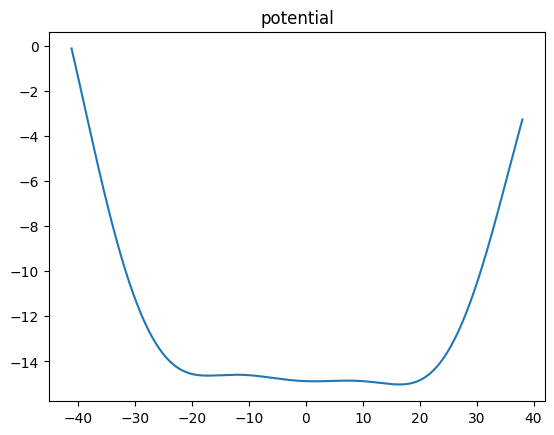

In [55]:
#Visualize Potential
Show_Sigmoid(ansatz)

In [56]:
#save
save_ansatz(ansatz,L,KEY,dir_mod)

# 8

In [57]:
L=8
depth = J-int(np.log2(L))
print('depth = '+str(depth))
phi_s = load_data(W,Data,depth,J,show_hist=False)

depth = 4


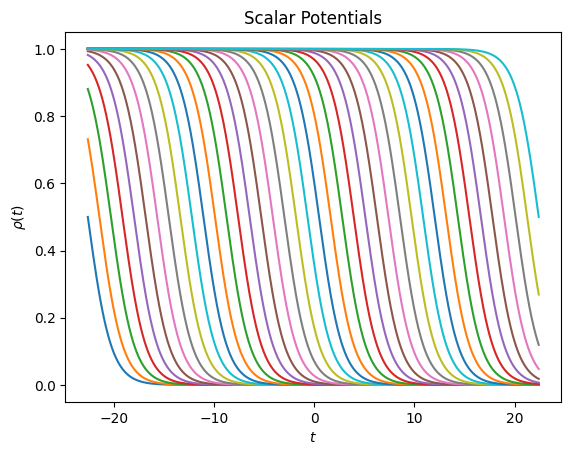

In [58]:
#Scalar Potentials Positioning
window_min,window_max = phi_s.min(),phi_s.max()
num_potentials = 40
centers,sigma = linspace_centers(window_min,window_max,num_potentials,extent =1,device='cuda')
#Visualize
Plot_Sigmoid(centers,sigma)
#Shifts
shifts = shifts_quad(2,2)
mode = 'All'
#Ansatz
ansatz =ANSATZ_Wavelet(W,L,centers,sigma,mode,shifts)

In [59]:
#Train Ansatz
dataloader = torch.utils.data.DataLoader(phi_s[::10], batch_size=100)
#direct_estimate(dataloader,ansatz,mean_mode=False)
Diagonal_Renormalisation(dataloader,ansatz,mean_mode=False)
optim(ansatz,dataloader,num_epochs=50,lr=1e-2,momentum=0,weight_decay=0)
optim(ansatz,dataloader,num_epochs=50,lr=1e-3,momentum=0,weight_decay=0)

[0/50] loss: 0.0
[0/50] loss: -1.1225158
[0/50] loss: -1.873946
[0/50] loss: -2.5740664
[0/50] loss: -3.0626614
[0/50] loss: -3.1972713
[0/50] loss: -3.9232054
[0/50] loss: -4.0401855
[0/50] loss: -4.3582573
[0/50] loss: -4.2951264
[1/50] loss: -4.6099682
[1/50] loss: -4.1674891
[1/50] loss: -4.4604521
[1/50] loss: -4.6309314
[1/50] loss: -4.3378735
[1/50] loss: -4.5652008
[1/50] loss: -4.8701386
[1/50] loss: -4.9631939
[1/50] loss: -4.8775902
[1/50] loss: -4.703217
[2/50] loss: -4.7225208
[2/50] loss: -4.8729649
[2/50] loss: -4.872272
[2/50] loss: -4.6403232
[2/50] loss: -4.8366604
[2/50] loss: -4.7008548
[2/50] loss: -4.8978391
[2/50] loss: -5.0145626
[2/50] loss: -4.9271121
[2/50] loss: -4.8925219
[3/50] loss: -4.9262719
[3/50] loss: -4.7142692
[3/50] loss: -4.8815236
[3/50] loss: -4.5091629
[3/50] loss: -4.7057147
[3/50] loss: -4.9410725
[3/50] loss: -5.0151801
[3/50] loss: -5.2053876
[3/50] loss: -4.9789205
[3/50] loss: -4.9776092
[4/50] loss: -4.5169106
[4/50] loss: -4.773778
[4/

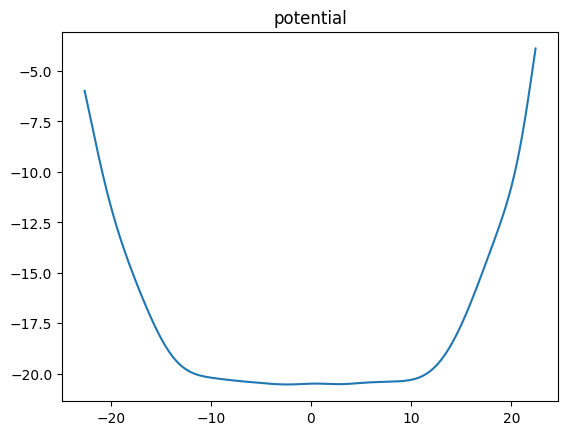

In [60]:
#Visualize Potential
Show_Sigmoid(ansatz)

In [61]:
#save
save_ansatz(ansatz,L,KEY,dir_mod)

# 16

In [62]:
L=16
depth = J-int(np.log2(L))
print('depth = '+str(depth))
phi_s = load_data(W,Data,depth,J,show_hist=False)

depth = 3


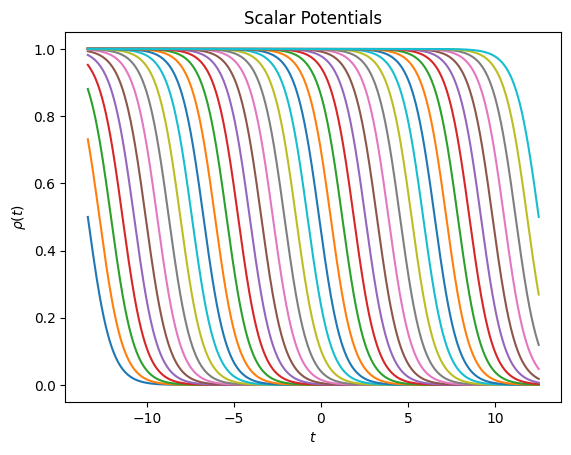

In [63]:
#Scalar Potentials Positioning
window_min,window_max = phi_s.min(),phi_s.max()
num_potentials = 40
centers,sigma = linspace_centers(window_min,window_max,num_potentials,extent =1,device='cuda')
#Visualize
Plot_Sigmoid(centers,sigma)
#Shifts
shifts = shifts_quad(4,4)
mode = 'All'
#Ansatz
ansatz =ANSATZ_Wavelet(W,L,centers,sigma,mode,shifts)

In [64]:
#Train Ansatz
dataloader = torch.utils.data.DataLoader(phi_s[::10], batch_size=100)
#direct_estimate(dataloader,ansatz,mean_mode=False)
Diagonal_Renormalisation(dataloader,ansatz,mean_mode=False)
optim(ansatz,dataloader,num_epochs=10,lr=1e-2,momentum=0,weight_decay=0)
optim(ansatz,dataloader,num_epochs=10,lr=1e-3,momentum=0,weight_decay=0)

[0/10] loss: 0.0
[0/10] loss: -13.051714
[0/10] loss: -23.530405
[0/10] loss: -31.104172
[0/10] loss: -37.339634
[0/10] loss: -41.3904
[0/10] loss: -43.355202
[0/10] loss: -47.214928
[0/10] loss: -49.530079
[0/10] loss: -50.42408
[1/10] loss: -51.756111
[1/10] loss: -50.496876
[1/10] loss: -53.400463
[1/10] loss: -55.233528
[1/10] loss: -54.817833
[1/10] loss: -56.734013
[1/10] loss: -54.31049
[1/10] loss: -54.980907
[1/10] loss: -53.680241
[1/10] loss: -57.860443
[2/10] loss: -57.160454
[2/10] loss: -53.990635
[2/10] loss: -56.805256
[2/10] loss: -56.695503
[2/10] loss: -56.85569
[2/10] loss: -57.800888
[2/10] loss: -60.209187
[2/10] loss: -56.259892
[2/10] loss: -58.640697
[2/10] loss: -63.688839
[3/10] loss: -59.227806
[3/10] loss: -55.296242
[3/10] loss: -55.577431
[3/10] loss: -59.391796
[3/10] loss: -60.654034
[3/10] loss: -56.64875
[3/10] loss: -58.430939
[3/10] loss: -57.951279
[3/10] loss: -58.215675
[3/10] loss: -60.670185
[4/10] loss: -55.272301
[4/10] loss: -57.143574
[4/10

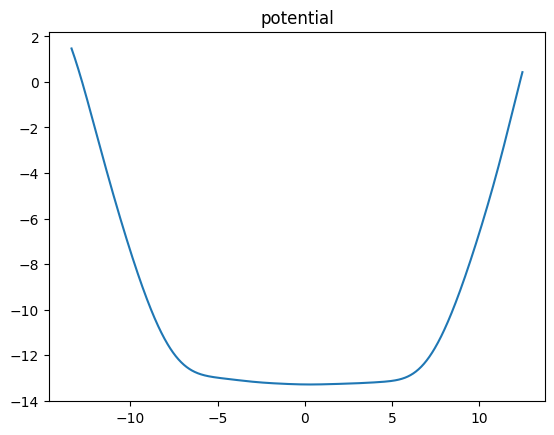

In [65]:
#Visualize Potential
Show_Sigmoid(ansatz)

In [66]:
#save
save_ansatz(ansatz,L,KEY,dir_mod)

# 32

In [6]:
L=32
depth = J-int(np.log2(L))
print('depth = '+str(depth))
phi_s = load_data(W,Data,depth,J,show_hist=False)

depth = 2


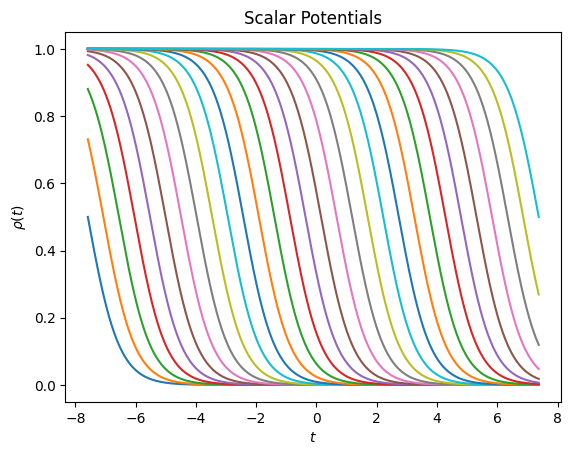

In [16]:
#Scalar Potentials Positioning
window_min,window_max = phi_s.min(),phi_s.max()
num_potentials = 30
centers,sigma = linspace_centers(window_min,window_max,num_potentials,extent =1,device='cuda')
#Visualize
Plot_Sigmoid(centers,sigma)
#Shifts
shifts = shifts_quad(8,8)
mode = 'All'
#Ansatz
ansatz =ANSATZ_Wavelet(W,L,centers,sigma,mode,shifts)

In [17]:
#Train Ansatz
dataloader = torch.utils.data.DataLoader(phi_s[::50], batch_size=50)
#direct_estimate(dataloader,ansatz,mean_mode=False)
Diagonal_Renormalisation(dataloader,ansatz,mean_mode=True)
optim(ansatz,dataloader,num_epochs=50,lr=1e-3,momentum=0,weight_decay=0)

[0/50] loss: 0.0
[0/50] loss: -16.636583
[0/50] loss: -32.578426
[0/50] loss: -49.332691
[1/50] loss: -65.381836
[1/50] loss: -77.82608
[1/50] loss: -93.924332
[1/50] loss: -107.65012
[2/50] loss: -121.55801
[2/50] loss: -134.58098
[2/50] loss: -146.81668
[2/50] loss: -161.92776
[3/50] loss: -172.49364
[3/50] loss: -182.73346
[3/50] loss: -196.7054
[3/50] loss: -213.63803
[4/50] loss: -218.87465
[4/50] loss: -231.72888
[4/50] loss: -240.13776
[4/50] loss: -254.39481
[5/50] loss: -260.75293
[5/50] loss: -267.69861
[5/50] loss: -281.04071
[5/50] loss: -294.79797
[6/50] loss: -301.6889
[6/50] loss: -302.96573
[6/50] loss: -317.55374
[6/50] loss: -328.3042
[7/50] loss: -334.23569
[7/50] loss: -340.09601
[7/50] loss: -340.08661
[7/50] loss: -359.75616
[8/50] loss: -361.47351
[8/50] loss: -362.46362
[8/50] loss: -374.73181
[8/50] loss: -382.05057
[9/50] loss: -391.90363
[9/50] loss: -388.15729
[9/50] loss: -410.31708
[9/50] loss: -411.56161
[10/50] loss: -409.84491
[10/50] loss: -408.6701
[1

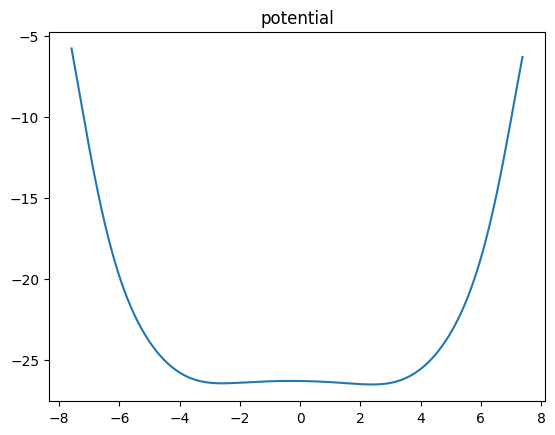

In [18]:
#Visualize Potential
Show_Sigmoid(ansatz)

In [19]:
#save
save_ansatz(ansatz,L,KEY,dir_mod)

# 64

In [20]:
L=64
depth = J-int(np.log2(L))
print('depth = '+str(depth))
phi_s = load_data(W,Data,depth,J,show_hist=False)

depth = 1


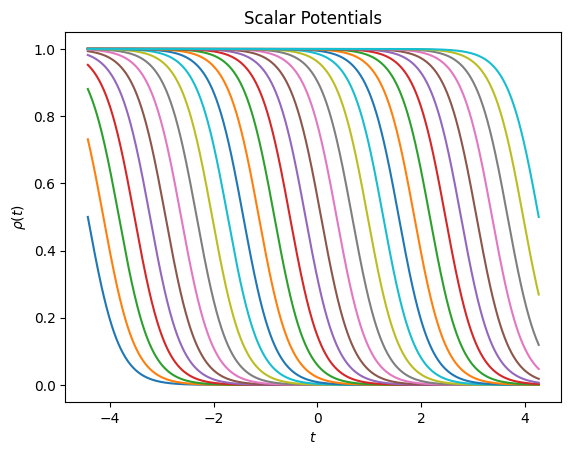

In [24]:
#Scalar Potentials Positioning
window_min,window_max = phi_s.min(),phi_s.max()
num_potentials = 30
centers,sigma = linspace_centers(window_min,window_max,num_potentials,extent =1,device='cuda')
#Visualize
Plot_Sigmoid(centers,sigma)
#Shifts
shifts = shifts_quad(4,4)
mode = 'All'
#Ansatz
ansatz =ANSATZ_Wavelet(W,L,centers,sigma,mode,shifts)

In [25]:
#Train Ansatz
dataloader = torch.utils.data.DataLoader(phi_s[::20], batch_size=50)
#direct_estimate(dataloader,ansatz,mean_mode=False)
Diagonal_Renormalisation(dataloader,ansatz,mean_mode=True)
optim(ansatz,dataloader,num_epochs=2,lr=1e-2,momentum=0,weight_decay=0)
optim(ansatz,dataloader,num_epochs=2,lr=1e-3,momentum=0,weight_decay=0)

/usr/local/lib/python3.10/dist-packages/torch/_functorch/deprecated.py:80: UserWarning: We've integrated functorch into PyTorch. As the final step of the integration, functorch.jacrev is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use torch.func.jacrev instead; see the PyTorch 2.0 release notes and/or the torch.func migration guide for more details https://pytorch.org/docs/master/func.migrating.html
  warn_deprecated('jacrev')
/usr/local/lib/python3.10/dist-packages/torch/_functorch/deprecated.py:58: UserWarning: We've integrated functorch into PyTorch. As the final step of the integration, functorch.vmap is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use torch.vmap instead; see the PyTorch 2.0 release notes and/or the torch.func migration guide for more details https://pytorch.org/docs/master/func.migrating.html
  warn_deprecated('vmap', 'torch.vmap')
/usr/local/lib/python3.10/dist-pa

[0/2] loss: 0.0
[0/2] loss: -1684.8558
[0/2] loss: -2922.3918
[0/2] loss: -3876.033
[0/2] loss: -4530.3711
[0/2] loss: -5027.8481
[0/2] loss: -5534.7773
[0/2] loss: -5813.2896
[0/2] loss: -6060.6924
[0/2] loss: -6275.9199
[1/2] loss: -6352.1455
[1/2] loss: -6470.2026
[1/2] loss: -6561.1694
[1/2] loss: -6727.1567
[1/2] loss: -6800.8599
[1/2] loss: -6768.5747
[1/2] loss: -6721.6719
[1/2] loss: -6909.5347
[1/2] loss: -6764.8931
[1/2] loss: -6844.9009
[0/2] loss: -6873.6118
[0/2] loss: -6909.8423
[0/2] loss: -6920.645
[0/2] loss: -6899.7026
[0/2] loss: -6902.6616
[0/2] loss: -6837.4038
[0/2] loss: -6970.6045
[0/2] loss: -6946.1611
[0/2] loss: -6871.688
[0/2] loss: -6955.7471
[1/2] loss: -6918.2139
[1/2] loss: -6938.9463
[1/2] loss: -6874.3882
[1/2] loss: -6952.4824
[1/2] loss: -6890.4141
[1/2] loss: -6990.5679
[1/2] loss: -6910.688
[1/2] loss: -6958.1611
[1/2] loss: -6884.4644
[1/2] loss: -6953.4141


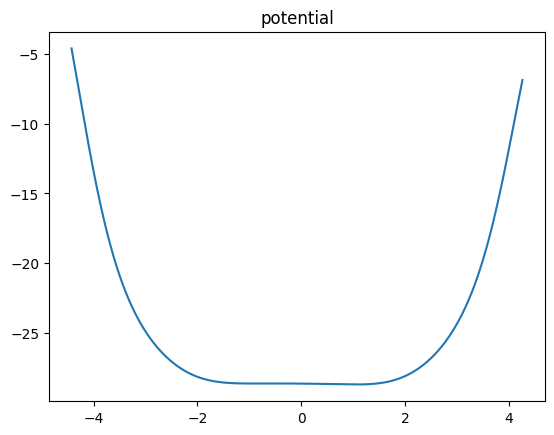

In [26]:
#Visualize Potential
Show_Sigmoid(ansatz)

In [27]:
#save
save_ansatz(ansatz,L,KEY,dir_mod)

# 128

In [28]:
L=128
depth = J-int(np.log2(L))
print('depth = '+str(depth))
phi_s = load_data(W,Data,depth,J,show_hist=False)

depth = 0


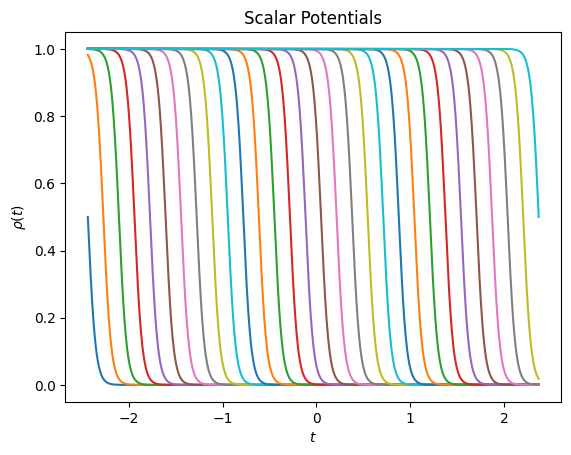

In [29]:
#Scalar Potentials Positioning
window_min,window_max = phi_s.min(),phi_s.max()
num_potentials = 30
centers,sigma = linspace_centers(window_min,window_max,num_potentials,extent =0.5*0.5,device='cuda')
#Visualize
Plot_Sigmoid(centers,sigma)
#Shifts
shifts = shifts_quad(6,6)
mode = 'All'
#Ansatz
ansatz =ANSATZ_Wavelet(W,L,centers,sigma,mode,shifts)

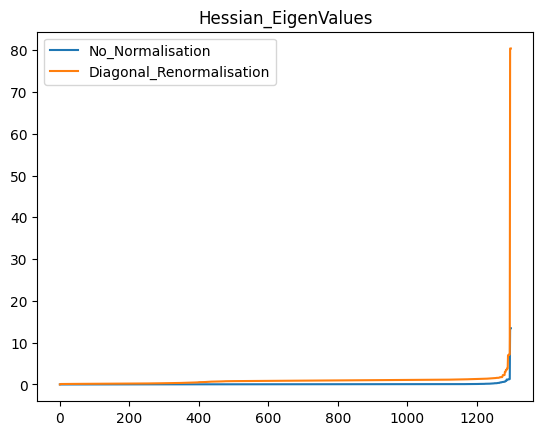

No_Normalisation_Conditioning = tensor(28516026.)
Diagonal_Renormalisation_Conditioning = tensor(6865.8086)
LOSS =tensor(-84878.3594, device='cuda:0', grad_fn=<SubBackward0>)


In [30]:
#Train Ansatz
dataloader = torch.utils.data.DataLoader(phi_s[::10], batch_size=20)
direct_estimate(dataloader,ansatz,mean_mode=True)

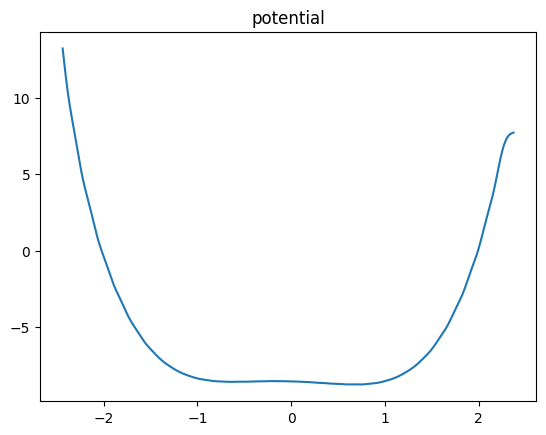

In [31]:
#Visualize Potential
Show_Sigmoid(ansatz)

In [32]:
#save
save_ansatz(ansatz,L,KEY,dir_mod)

# Show Potentials

Visualising the learned potentials $\bar V_j(x_{j-1})$

In [33]:
STD = []
for j in range(1,8):
  L=2**j
  depth = J-int(np.log2(L))
  print('depth = '+str(depth))
  phi_s = load_data(W,Data,depth,J,show_hist=False)
  STD.append(phi_s.std())

depth = 6
depth = 5
depth = 4
depth = 3
depth = 2
depth = 1
depth = 0


In [35]:
ANSATZ =[]
for j in range(1,8):
  L=2**j
  ANSATZ.append(load_ansatz(L,KEY,dir_mod))

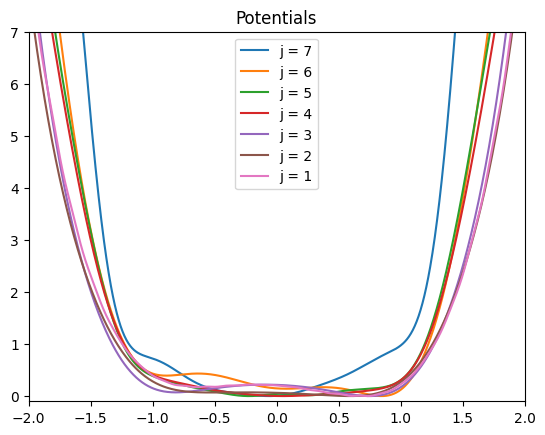

In [47]:
index_scalar=0
index_quad=1
for j in range(1,8):
  Sc = ANSATZ[j-1].ansatze[index_scalar] 
  window_min =Sc.centers[0]
  window_max =Sc.centers[-1]
  #POTENTIAL
  X=torch.linspace(window_min,window_max,1000).cuda()
  U=torch.sigmoid(-(X[None, :] - Sc.centers[:, None]) / (Sc.sigma[:,None] )) # (M, D) to (M,)
  
  #Num_potentials
  n_pot = 0
  for i in range(0,index_scalar):
    n_pot+=ansatz_union.ansatze[i].num_potentials
  n_scalar = ANSATZ[j-1].ansatze[index_scalar].num_potentials
  #theta learned
  theta =ANSATZ[j-1].theta()[n_pot:n_pot+n_scalar]
  
  #Compute Trace

  Sq = Square_laplacian(ANSATZ[j-1],Free=False,index_quad=index_quad)
  U=(theta@U+(Sq/2)*X**2).cpu().detach()
  U= U-(U[100:]).min()
  
  plt.plot(X.cpu().detach()/STD[j-1].cpu(),U.cpu(),label='j = '+str(J-j+1))
plt.legend()
plt.xlim(-2,2)
plt.ylim(-0.1,7)
plt.title('Potentials')
plt.show()